In [1]:
import os  
os.environ["OMP_NUM_THREADS"] = "1"  # KMeans 사용 시 스레드 수를 1로 제한하여 메모리 누수 문제를 방지

from sklearn.datasets import load_iris  
from sklearn.cluster import KMeans  
import pandas as pd  

iris = load_iris()  # Iris 데이터셋을 로드
print('target :', iris.target)  # Iris 데이터셋의 정답(target) 배열을 출력
print('target name:', iris.target_names)  # Iris 데이터셋의 클래스 이름 배열을 출력

# Iris 데이터의 특성 데이터를 DataFrame으로 변환하고 열 이름을 지정
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# KMeans 모델을 생성: 군집 수는 3개, 초기화 방식은 'k-means++', 최대 반복 횟수는 300회, 난수 시드는 0으로 설정
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)  # KMeans 모델을 irisDF 데이터로 학습
print(kmeans.labels_)  # 학습된 모델의 군집 레이블을 출력

kmeans.fit_predict(irisDF)  # 데이터를 학습시키고 각 데이터에 대한 군집 레이블을 예측

kmeans.fit_transform(irisDF)  # 데이터를 학습시키고 각 데이터와 군집 중심 간의 거리를 반환

irisDF['target'] = iris.target  # irisDF에 실제 타겟 값을 담은 'target' 열을 추가
irisDF['cluster'] = kmeans.labels_  # irisDF에 예측된 군집 레이블을 담은 'cluster' 열을 추가

# 실제 타겟과 예측된 군집 레이블로 그룹화하여 각 그룹의 sepal_length 개수를 계산
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)  # 그룹화된 결과를 출력


target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target name: ['setosa' 'versicolor' 'virginica']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(150)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [3]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

NameError: name 'plt' is not defined

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#n_samples: 생성할 총 데이터의 개수. 디폴트는 100개
#n_features: 데이터의 피처 개수. 보통 첫 번째 피처는 x 좌표, 두 번째 피처 는 y 좌표상에 표현
#centers: int 값으로 군집의 개수. ndarray 형태로 표현할 경우 개별 군 집 중심점의 좌표를 의미
#cluster_std: 생성될 군집 데이터의 표준 편차. float 값 0.8로 지정시 군집내에서 데이터가 표준편차 0.8 값
#[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 각 군집내 데이터의 표준편차로 만든다.

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

In [ ]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

In [ ]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    center_x_y = centers[label]
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

kmeans.cluster_centers_

print(clusterDF.groupby('target')['kmeans_label'].value_counts())

In [ ]:
#############################################
# 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가
#############################################
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 붓꽃 데이터 세트 피처들을 DataFrame 변환. 
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

# 개별 데이터에 대한 군집 결과를 cluster 컬럼으로 DataFrame에 저장. 
irisDF['cluster'] = kmeans.labels_

print(irisDF.head(150))

print(irisDF.shape)

irisDF['cluster'].value_counts()

In [ ]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples
print(irisDF.head(150))

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.groupby('cluster')['silhouette_coeff'].mean()

irisDF['silhouette_coeff'].hist()

irisDF['silhouette_coeff'].mean()

In [ ]:
#####################################################################
#클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법
#####################################################################
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

In [ ]:
#################################################################
# KDE(Kernel Density Estimation)의 이해
# seaborn의 distplot()을 이용하여 KDE 시각화
# https://seaborn.pydata.org/tutorial/distributions.html
#################################################################
import numpy as np
import seaborn as sns

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)  #평균loc=0, 표준편차scale=1인 정규분포 
print(x)
sns.distplot(x)

In [ ]:
sns.distplot(x, rug=True)

In [ ]:
sns.distplot(x, kde=False, rug=True)

In [ ]:
sns.distplot(x, hist=False, rug=True)

In [ ]:
# 개별 관측데이터에 대해 가우시안 커널 함수를 적용

from scipy import stats


#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)  # 표준편차=bandeidth
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3)

In [ ]:
from scipy.integrate import trapz
import matplotlib.pyplot as plt
%matplotlib inline

density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

In [ ]:
# seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음
sns.kdeplot(x, shade=True);

In [ ]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

In [ ]:
#사이킷런을 이용한 Mean Shift
#make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

# 커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

# 최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.25)
print('bandwidth 값:', round(bandwidth,3))

 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth


# 데이터프레임 생성 (X와 y가 미리 정의된 상태라 가정)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# bandwidth 추정 및 MeanShift 실행
best_bandwidth = estimate_bandwidth(X, quantile=0.25)  # bandwidth를 추정합니다.
meanshift = MeanShift(bandwidth=best_bandwidth)  # 명시적으로 bandwidth를 설정합니다.
cluster_labels = meanshift.fit_predict(X)  # 클러스터 레이블을 예측합니다.

# 결과 출력
print('cluster labels 유형:', np.unique(cluster_labels))  # 고유한 클러스터 레이블을 출력합니다.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

print(clusterDF.groupby('target')['meanshift_label'].value_counts())

In [ ]:
#GMM 을 이용한 붓꽃 데이터 셋 클러스터링
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

#GaussianMixture를 이용하여 붓꽃 데이터 군집화
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels


# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

In [ ]:
# 붓꽃 데이터 K-Means 군집화 결과

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

In [ ]:
# 클러스터링 결과를 시각화하는 함수 생성

### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()


In [ ]:
# GMM군집화와 K-Means군집화를 비교하기 위해 타원형으로 늘어선 임의의 데이터 세트를 생성(실제값)
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [ ]:
# K-Means 군집화 수행
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

In [ ]:
# GMM 군집화 수행
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [ ]:
# GMM과 K-Means 군집화 결과 비교
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())


In [ ]:
###################################
# DBSCAN 적용하기 – 붓꽃 데이터 셋
###################################
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()


In [ ]:
# eps 0.6 min_samples=8 로 DBSCAN 군집화 적용
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
#PCA 2개 컴포넌트로 기존 feature들을 차원 축소 후 시각화
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [ ]:
# eps의 크기를 증가 한 후 노이즈 확인 (노이즈 감소)
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [ ]:
# min_samples의 크기를 증가 후 노이즈 확인 (노이즈 증가)
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [ ]:
#DBSCAN 적용하기 – make_circles() 데이터 세트
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [ ]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

In [ ]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

In [ ]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

In [ ]:
###############################
#실습
###############################
#데이터 셋 로딩과 데이터 클린징

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)


In [ ]:
retail_df.info()

In [ ]:
#반품이나 CustomerID가 Null인 데이터는 제외, 영국 이외 국가의 데이터는 제외
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

In [ ]:
retail_df['Country'].value_counts()[:5]

In [ ]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

In [ ]:
# RFM 기반 데이터 가공
# 구매금액 생성
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

In [ ]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

In [ ]:
# 고객 기준으로 Recency, Frequency, Monetary가공
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

In [ ]:
cust_df['Recency'].max()

In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

In [ ]:
#RFM 기반 고객 세그먼테이션
#Recency, Frequency, Monetary 값의 분포도 확인
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [ ]:
cust_df[['Recency','Frequency','Monetary']].describe()

In [ ]:
# K-Means로 군집화 후에 실루엣 계수 평가
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features) #정규분포

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

In [ ]:
#K-Means 군집화 후에 실루엣 계수 및 군집을 시각화
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [ ]:
# 로그 변환 후 재 시각화
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

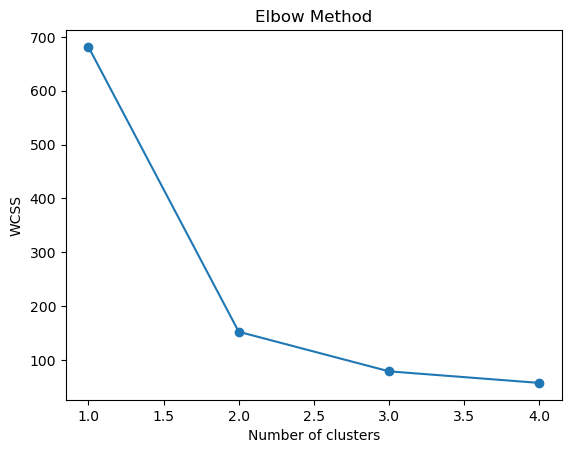

In [188]:
##############################
# Elbow
##############################
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib 라이브러리 import
from sklearn.datasets import load_iris  # iris 데이터셋을 로드하기 위한 모듈 import
from sklearn.cluster import KMeans  # KMeans 군집화 알고리즘을 사용하기 위한 모듈 import

# 데이터 로드
iris = load_iris()  # iris 데이터셋 로드
data = iris.data  # iris 데이터셋에서 입력 데이터(features) 추출

# 엘보 기법을 사용한 최적의 군집 수 찾기
wcss = []  # 각 군집 수에 대한 WCSS 값을 저장할 리스트 초기화
for k in range(1, 5):  # 군집 수를 1부터 10까지 변경하며 반복
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)  # k개의 군집을 가지는 KMeans 모델 생성
    kmeans.fit(data)  # KMeans 모델을 데이터에 학습시킴
    wcss.append(kmeans.inertia_)  # 학습된 모델의 관성 값(WCSS)을 리스트에 추가

# 그래프 시각화
plt.plot(range(1, 5), wcss, marker='o')  # 군집 수에 따른 WCSS 값을 선 그래프로 시각화
plt.title('Elbow Method')  # 그래프 제목 설정
plt.xlabel('Number of clusters')  # x축 레이블 설정
plt.ylabel('WCSS')  # y축 레이블 설정
plt.show()  # 그래프 출력



Silhouette Score: 0.551
Accuracy: 0.887


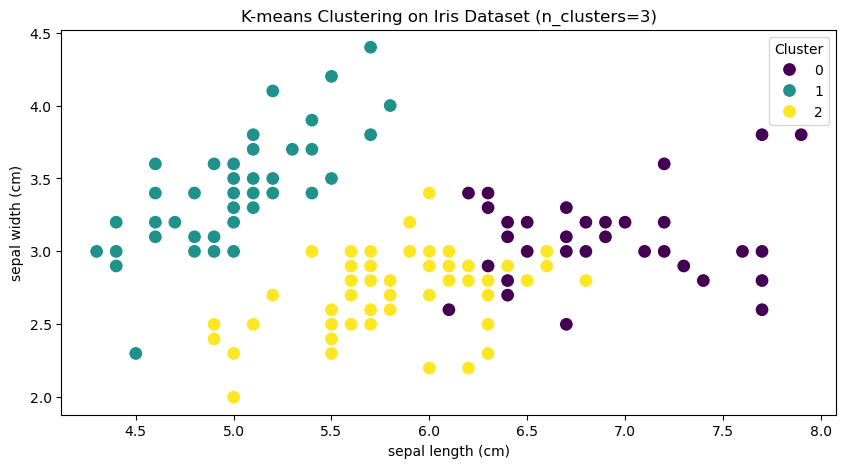

In [198]:
##############################
# Elbow (n_clusters=2,3)
##############################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
import pandas as pd
import seaborn as sns
from scipy.stats import mode

# 데이터 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# K-means 클러스터링 (군집 수를 2로 설정)
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(data)

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매핑하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(2):  # 각 군집에 대해 반복
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 데이터프레임으로 변환하여 클러스터 레이블 추가
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels  # 예측된 군집 레이블 추가

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=iris.feature_names[0], y=iris.feature_names[1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("K-means Clustering on Iris Dataset (n_clusters=2)")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()



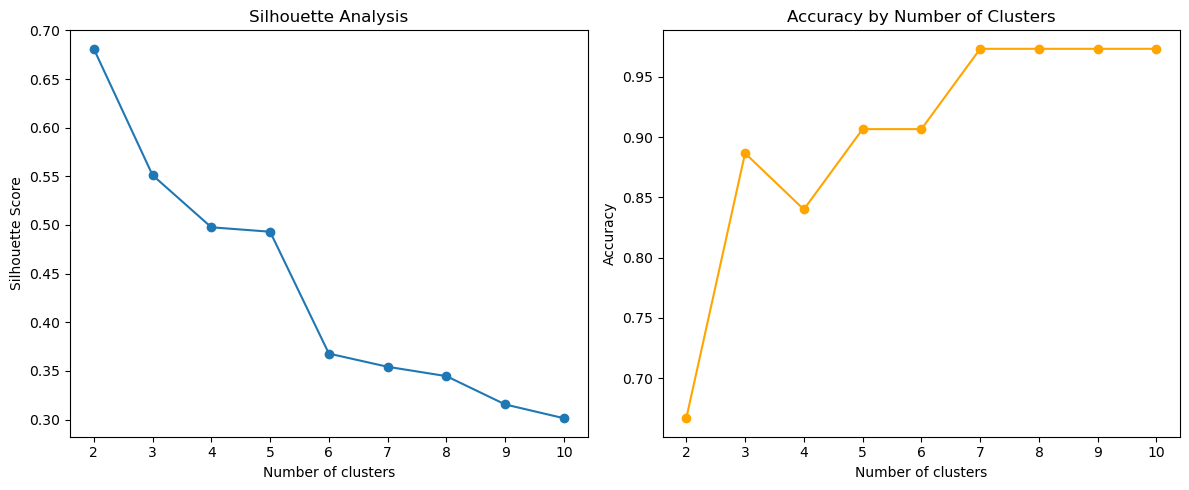

In [200]:
##############################
# silhouette
##############################
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.stats import mode

# 데이터 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# 실루엣 분석 및 정확도를 통한 최적의 군집 수 찾기
silhouette_scores = []
accuracies = []

for k in range(2, 11):  # 군집 수는 최소 2개 이상이어야 실루엣 점수를 계산할 수 있음
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    predicted_labels = kmeans.fit_predict(data)
    
    # Silhouette Score 계산
    silhouette = silhouette_score(data, predicted_labels)
    silhouette_scores.append(silhouette)
    
    # Accuracy 계산 (군집 레이블과 실제 레이블을 매핑하여 정확도 계산)
    mapped_labels = np.zeros_like(predicted_labels)
    for i in range(k):
        mask = (predicted_labels == i)
        mapped_labels[mask] = mode(true_labels[mask])[0]
    
    accuracy = accuracy_score(true_labels, mapped_labels)
    accuracies.append(accuracy)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

# 정확도 그래프 시각화
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), accuracies, marker='o', color='orange')
plt.title('Accuracy by Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


Silhouette Score: 0.551
Accuracy: 0.887


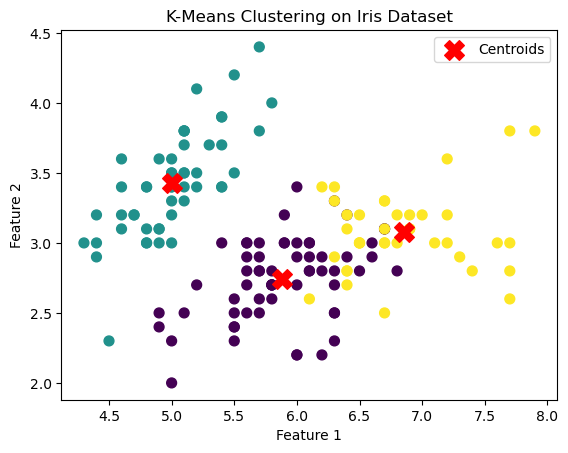

In [166]:
###########################################################
# [1-1] K-means
###########################################################

from sklearn.cluster import KMeans  # KMeans 군집화 알고리즘을 사용하기 위해 sklearn의 cluster 모듈에서 KMeans 클래스를 임포트
from sklearn.datasets import load_iris  # 예제 데이터로 iris 데이터셋을 불러오기 위해 sklearn의 datasets 모듈에서 load_iris 함수를 임포트
from sklearn.metrics import silhouette_score, accuracy_score  # Silhouette Score와 Accuracy 계산을 위해 임포트
import matplotlib.pyplot as plt  # 데이터를 시각화하기 위해 matplotlib의 pyplot 모듈을 plt로 임포트
import numpy as np  # 배열 계산을 위해 numpy를 임포트
from scipy.stats import mode  # Accuracy 계산 시 군집과 실제 라벨을 매핑하기 위해 mode 함수를 임포트

# 데이터 로드
iris = load_iris()  # load_iris 함수를 호출하여 iris 데이터셋을 로드하고, 이를 iris 변수에 저장
X = iris.data  # iris 데이터셋의 속성값(피처)들만 X에 저장(shape: [150, 4])
true_labels = iris.target  # 실제 라벨을 저장

# K-Means 알고리즘 적용
kmeans = KMeans(n_clusters=3, random_state=0)  # KMeans 객체를 생성하고, n_clusters=3으로 군집의 개수를 설정
kmeans.fit(X)  # KMeans 알고리즘을 사용하여 X 데이터셋에 대해 군집화를 수행하고, 각 데이터 포인트의 군집을 학습
labels = kmeans.labels_  # 학습 후, 각 데이터 포인트가 속하는 군집의 레이블을 labels에 저장

# Silhouette Score 계산
silhouette_avg = silhouette_score(X, labels)  # Silhouette Score 계산
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(labels)
for i in np.unique(labels):
    mask = (labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)  # X[:, 0] 모든행의 첫번째 열을 X좌표, X[:, 1] 모든행의 두번째 열을 Y좌표로 산점도 그리기
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')  # 군집 중심을 'X'로 표시
plt.title("K-Means Clustering on Iris Dataset")  # 그래프의 제목을 설정
plt.xlabel("Feature 1")  # X축 레이블을 'Feature 1'로 설정
plt.ylabel("Feature 2")  # Y축 레이블을 'Feature 2'로 설정
plt.legend()
plt.show()  # 그래프를 화면에 출력

Silhouette Score: 0.514
Accuracy: 0.667


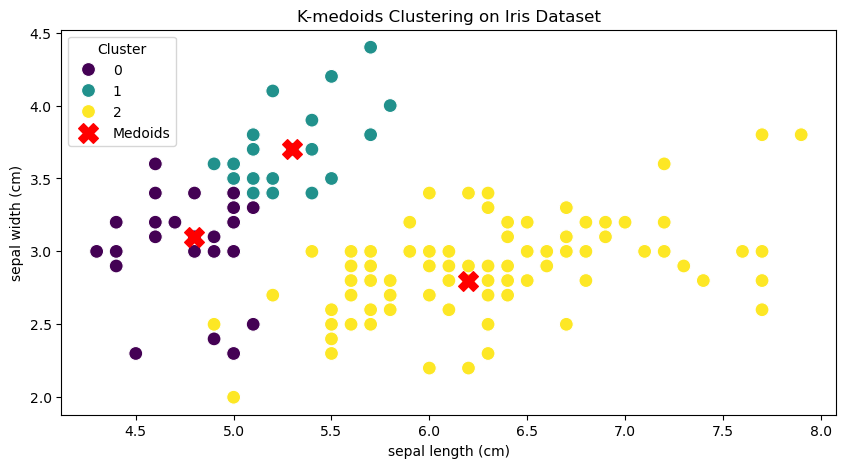

In [164]:
###########################################################
# [1-2] K-medoids
###########################################################
# scikit-learn-extra 설치오류로  K-Medoids 알고리즘 직접구현
# !pip install scikit-learn-extra 
# !pip install --upgrade setuptools wheel
# from sklearn_extra.cluster import KMedoids

import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

class KMedoids:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit_predict(self, X):
        if self.random_state:
            np.random.seed(self.random_state)

        # 1. 초기 메도이드를 랜덤으로 선택
        medoids = np.random.choice(len(X), self.n_clusters, replace=False)

        for _ in range(self.max_iter):
            # 각 데이터 포인트와 메도이드 간 거리 계산
            distances = cdist(X, X[medoids], metric='euclidean')
            labels = np.argmin(distances, axis=1)

            # 새로운 메도이드 계산
            new_medoids = np.copy(medoids)
            for i in range(self.n_clusters):
                cluster_points = np.where(labels == i)[0]
                intra_cluster_distances = cdist(X[cluster_points], X[cluster_points], metric='euclidean').sum(axis=1)
                new_medoids[i] = cluster_points[np.argmin(intra_cluster_distances)]

            # 메도이드가 변하지 않으면 종료
            if np.array_equal(medoids, new_medoids):
                break
            medoids = new_medoids

        self.labels_ = labels
        self.medoids_ = X[medoids]
        return self.labels_

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# KMedoids 알고리즘 적용
kmedoids = KMedoids(n_clusters=3, random_state=0)
clusters = kmedoids.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = clusters  # 군집화 결과 추가

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(clusters)
for i in np.unique(clusters):
    mask = (clusters == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmedoids.medoids_[:, 0], kmedoids.medoids_[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title("K-medoids Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # X축: 첫 번째 특징
plt.ylabel(iris.feature_names[1])  # Y축: 두 번째 특징
plt.legend(title='Cluster')
plt.show()



Silhouette Score: 0.545
Accuracy: 0.940


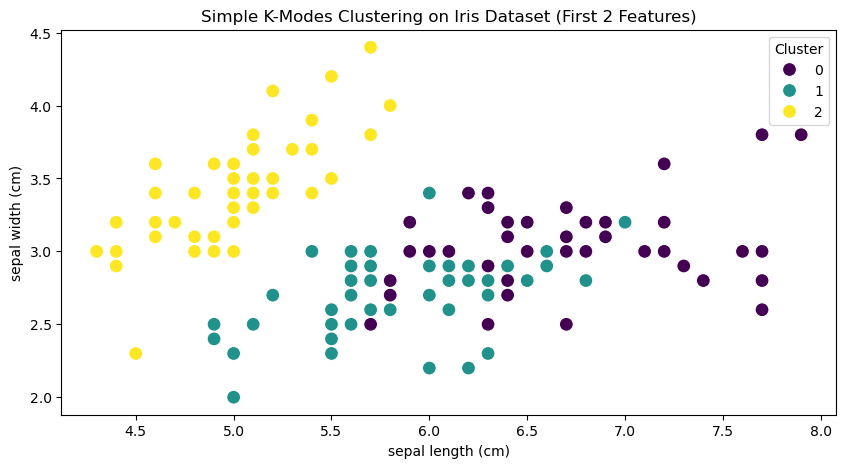

In [162]:
###########################################################
# [1-3] K-modes
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

class SimpleKModes:
    def __init__(self, n_clusters=3, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit_predict(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        
        # 초기 클러스터 중심을 무작위로 선택
        centers = X.sample(n=self.n_clusters, random_state=self.random_state).to_numpy()
        
        for _ in range(self.max_iter):
            # 각 데이터 포인트와 중심 간 일치하지 않는 항목 수로 거리 계산
            distances = np.array([[np.sum(x != center) for center in centers] for x in X.to_numpy()])
            labels = np.argmin(distances, axis=1)
            
            # 각 클러스터에 대해 새로운 중심 계산
            new_centers = np.array([
                X[labels == i].mode().iloc[0].to_numpy() if len(X[labels == i]) > 0 else centers[i]
                for i in range(self.n_clusters)
            ])
            
            # 중심이 변하지 않으면 수렴
            if np.array_equal(centers, new_centers):
                break
            centers = new_centers

        self.labels_ = labels
        self.centers_ = centers
        return labels

# Iris 데이터셋 로드
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

# 데이터를 범주형으로 변환 (Low, Medium, High)
data_cat = data.apply(lambda x: pd.cut(x, bins=3, labels=["Low", "Medium", "High"]))

# 범주형 데이터를 숫자로 인코딩
data_encoded = data_cat.apply(lambda x: x.cat.codes)

# Simple K-Modes 클러스터링 적용
simple_kmodes = SimpleKModes(n_clusters=3, max_iter=100, random_state=0)
clusters = simple_kmodes.fit_predict(data_encoded)

# 군집화 결과 추가
data["Cluster"] = clusters  # 원본 데이터에 군집화 결과를 추가

# Silhouette Score 계산
silhouette_avg = silhouette_score(data_encoded, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(clusters)
for i in np.unique(clusters):
    mask = (clusters == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue="Cluster", data=data, palette="viridis", s=100)
plt.title("Simple K-Modes Clustering on Iris Dataset (First 2 Features)")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title="Cluster")
plt.show()


Silhouette Score: 0.553
Accuracy: 0.893


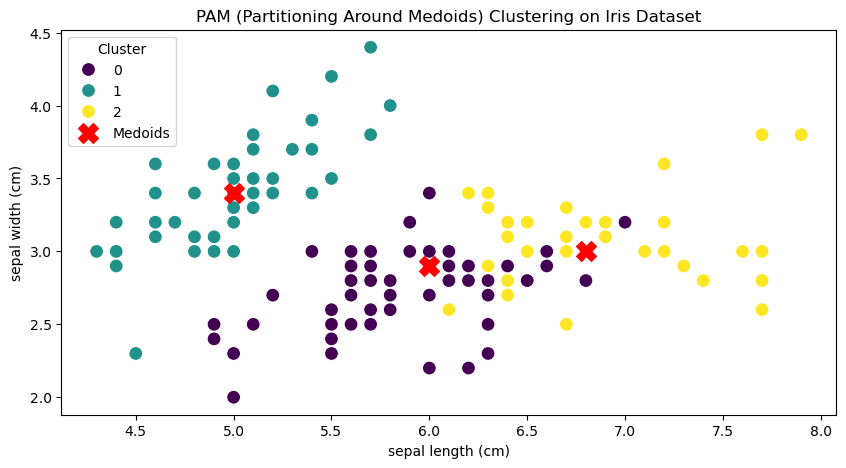

In [160]:
###########################################################
# [1-4] PAM(Partitioning Around Medoids)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

class PAM:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit_predict(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        
        # 1. 초기 메도이드 선택 (랜덤 샘플링)
        medoids = np.random.choice(len(X), self.n_clusters, replace=False)
        
        for _ in range(self.max_iter):
            # 각 포인트와 모든 메도이드 간 거리 계산
            distances = cdist(X, X[medoids], metric='euclidean')
            labels = np.argmin(distances, axis=1)
            
            # 새로운 메도이드 계산
            new_medoids = np.copy(medoids)
            for i in range(self.n_clusters):
                # 현재 군집에 속한 데이터 포인트의 인덱스 추출
                cluster_points = np.where(labels == i)[0]
                
                # 군집 내 데이터 포인트 간 거리의 총합이 최소가 되는 포인트를 메도이드로 설정
                intra_cluster_distances = cdist(X[cluster_points], X[cluster_points], metric='euclidean').sum(axis=1)
                new_medoids[i] = cluster_points[np.argmin(intra_cluster_distances)]
            
            # 메도이드가 변화가 없으면 종료
            if np.array_equal(medoids, new_medoids):
                break
            medoids = new_medoids
        
        self.labels_ = labels
        self.medoids_ = medoids
        return self.labels_

# Iris 데이터셋 로드
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

# PAM 알고리즘 적용 (군집 수: 3)
pam = PAM(n_clusters=3, random_state=0)
clusters = pam.fit_predict(iris.data)  # 데이터에 맞춰 군집화 수행

# 군집화 결과를 데이터프레임에 추가
data['Cluster'] = clusters  # 각 데이터 포인트의 군집 레이블 추가

# Silhouette Score 계산
silhouette_avg = silhouette_score(iris.data, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(clusters)
for i in np.unique(clusters):
    mask = (clusters == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue='Cluster', data=data, palette='viridis', s=100)
plt.scatter(iris.data[pam.medoids_, 0], iris.data[pam.medoids_, 1], c='red', marker='X', s=200, label='Medoids')
plt.title("PAM (Partitioning Around Medoids) Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.519
Accuracy: 0.887


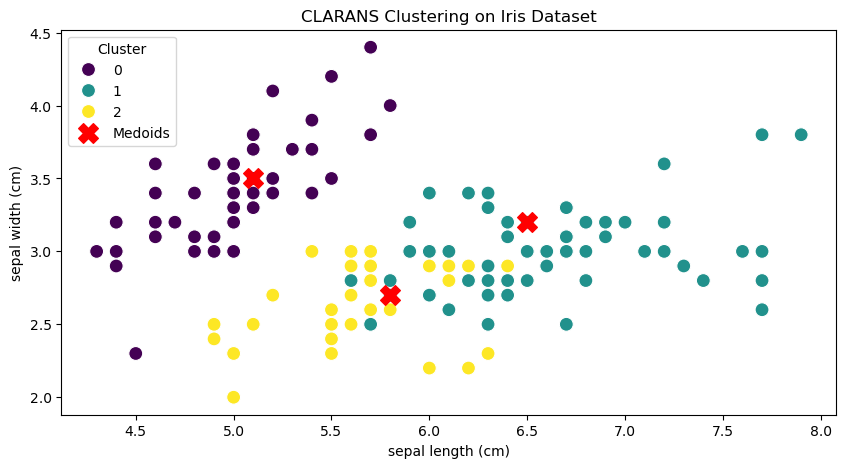

In [158]:
###########################################################
# [1-5] CLARANS(Clustering Large Applications based on RANdomized Search)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

class CLARANS:
    def __init__(self, n_clusters=3, numlocal=5, maxneighbor=10, random_state=None):
        self.n_clusters = n_clusters
        self.numlocal = numlocal  # 랜덤 초기화 반복 횟수
        self.maxneighbor = maxneighbor  # 각 초기화 당 랜덤 탐색 이웃 수
        self.random_state = random_state

    def fit_predict(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        
        best_medoids = None
        best_score = float('inf')
        labels = None

        # numlocal번의 랜덤 초기화 반복
        for _ in range(self.numlocal):
            # 초기 메도이드 랜덤 선택
            medoids = np.random.choice(len(X), self.n_clusters, replace=False)
            current_score = self._calculate_total_cost(X, medoids)

            improved = True
            while improved:
                improved = False
                # maxneighbor 번 만큼 랜덤으로 이웃 탐색
                for _ in range(self.maxneighbor):
                    # 현재 메도이드 중 하나와 비메도이드 중 하나를 교환
                    new_medoids = np.copy(medoids)
                    non_medoids = [i for i in range(len(X)) if i not in medoids]
                    new_medoids[np.random.randint(0, self.n_clusters)] = np.random.choice(non_medoids)
                    
                    # 새로운 메도이드 셋으로 비용 계산
                    new_score = self._calculate_total_cost(X, new_medoids)
                    if new_score < current_score:
                        medoids = new_medoids
                        current_score = new_score
                        improved = True
                        break
            
            # 최적의 메도이드 셋 업데이트
            if current_score < best_score:
                best_medoids = medoids
                best_score = current_score
                labels = np.argmin(cdist(X, X[best_medoids]), axis=1)

        self.medoids_ = best_medoids
        self.labels_ = labels
        return self.labels_

    def _calculate_total_cost(self, X, medoids):
        # 메도이드 셋에 대한 총 비용(거리 합계) 계산
        distances = cdist(X, X[medoids], metric='euclidean')
        return np.sum(np.min(distances, axis=1))

# Iris 데이터셋 로드
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

# CLARANS 알고리즘 적용 (군집 수: 3)
clarans = CLARANS(n_clusters=3, numlocal=5, maxneighbor=10, random_state=0)
clusters = clarans.fit_predict(iris.data)  # 데이터에 맞춰 군집화 수행

# 군집화 결과를 데이터프레임에 추가
data['Cluster'] = clusters  # 각 데이터 포인트의 군집 레이블 추가

# Silhouette Score 계산
silhouette_avg = silhouette_score(iris.data, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(clusters)
for i in np.unique(clusters):
    mask = (clusters == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue='Cluster', data=data, palette='viridis', s=100)
plt.scatter(iris.data[clarans.medoids_, 0], iris.data[clarans.medoids_, 1], c='red', marker='X', s=200, label='Medoids')
plt.title("CLARANS Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()

Silhouette Score: 0.553
Accuracy: 0.893


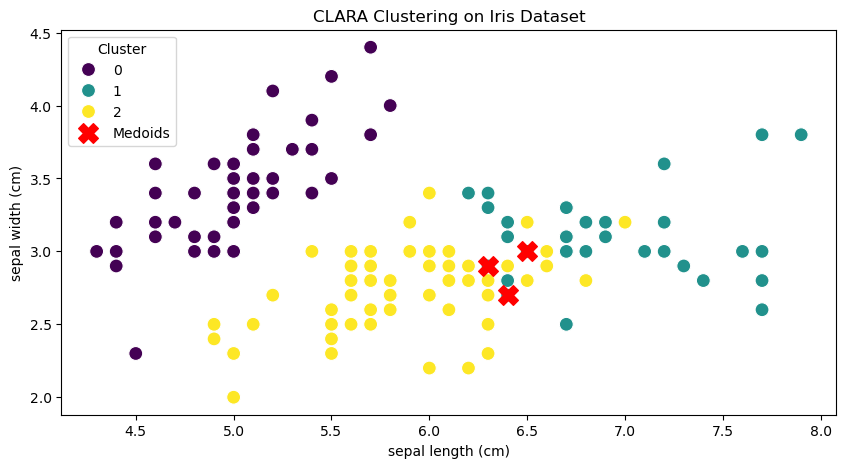

In [156]:
###########################################################
# [1-6] CLARA(Clustering LARge Applications)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

class CLARA:
    def __init__(self, n_clusters=3, n_samples=25, numlocal=5, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.n_samples = n_samples  # 각 샘플의 크기
        self.numlocal = numlocal    # PAM 반복 횟수
        self.max_iter = max_iter    # 최대 반복 횟수
        self.random_state = random_state

    def fit_predict(self, X):
        if self.random_state:
            np.random.seed(self.random_state)

        best_medoids = None
        best_score = float('inf')
        best_labels = None

        # numlocal 번의 샘플링 반복
        for _ in range(self.numlocal):
            # 데이터에서 무작위로 샘플링
            sample_indices = np.random.choice(len(X), self.n_samples, replace=False)
            sample = X[sample_indices]

            # PAM을 샘플에 적용하여 최적의 메도이드 찾기
            medoids = self._initialize_medoids(sample)
            for _ in range(self.max_iter):
                distances = cdist(sample, sample[medoids], metric='euclidean')
                labels = np.argmin(distances, axis=1)
                
                new_medoids = np.copy(medoids)
                for i in range(self.n_clusters):
                    cluster_points = np.where(labels == i)[0]
                    intra_cluster_distances = cdist(sample[cluster_points], sample[cluster_points], metric='euclidean').sum(axis=1)
                    new_medoids[i] = cluster_points[np.argmin(intra_cluster_distances)]

                if np.array_equal(medoids, new_medoids):
                    break
                medoids = new_medoids

            # 전체 데이터에 대한 비용 계산
            full_distances = cdist(X, sample[medoids], metric='euclidean')
            full_score = np.sum(np.min(full_distances, axis=1))

            # 더 나은 메도이드 셋이 발견되면 갱신
            if full_score < best_score:
                best_medoids = medoids
                best_score = full_score
                best_labels = np.argmin(full_distances, axis=1)

        self.medoids_ = sample[best_medoids]  # 최적의 메도이드를 전체 데이터셋에서 인덱싱
        self.labels_ = best_labels
        return self.labels_

    def _initialize_medoids(self, X):
        return np.random.choice(len(X), self.n_clusters, replace=False)

# Iris 데이터셋 로드
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

# CLARA 알고리즘 적용 (군집 수: 3)
clara = CLARA(n_clusters=3, n_samples=30, numlocal=5, max_iter=300, random_state=0)
clusters = clara.fit_predict(iris.data)  # 전체 데이터에 대해 군집화 수행

# 군집화 결과를 데이터프레임에 추가
data['Cluster'] = clusters  # 각 데이터 포인트의 군집 레이블 추가

# Silhouette Score 계산
silhouette_avg = silhouette_score(iris.data, clusters)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(clusters)
for i in np.unique(clusters):
    mask = (clusters == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue='Cluster', data=data, palette='viridis', s=100)
plt.scatter(clara.medoids_[:, 0], clara.medoids_[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title("CLARA Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.550
Accuracy: 0.893


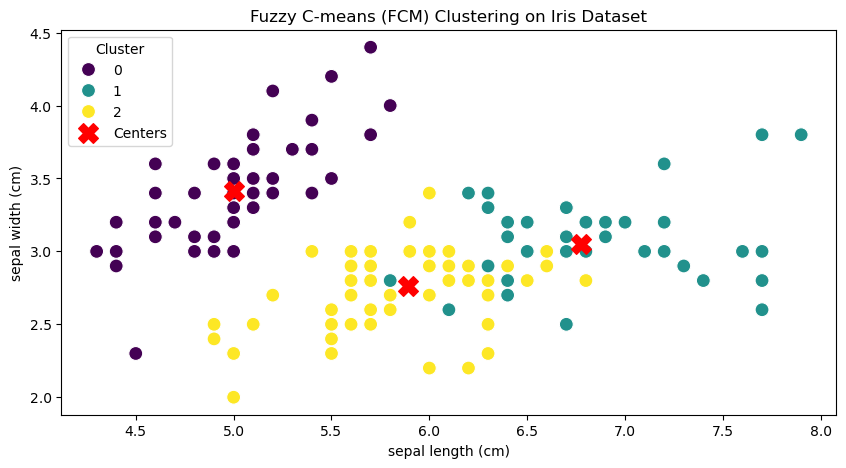

In [154]:
###########################################################
# [1-7] FCM(Fuzzy C-means)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

class FCM:
    def __init__(self, n_clusters=3, m=2.0, max_iter=300, error=1e-5, random_state=None):
        self.n_clusters = n_clusters
        self.m = m
        self.max_iter = max_iter
        self.error = error
        self.random_state = random_state

    def initialize_membership(self, n_samples):
        if self.random_state:
            np.random.seed(self.random_state)
        U = np.random.rand(n_samples, self.n_clusters)
        U = U / np.sum(U, axis=1, keepdims=True)
        return U

    def update_centers(self, X, U):
        um = U ** self.m
        return (um.T @ X) / np.sum(um.T, axis=1, keepdims=True)

    def update_membership(self, X, centers):
        dist = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        dist = np.fmax(dist, np.finfo(np.float64).eps)
        inv_dist = dist ** (- 2 / (self.m - 1))
        return inv_dist / np.sum(inv_dist, axis=1, keepdims=True)

    def fit(self, X):
        n_samples = X.shape[0]
        U = self.initialize_membership(n_samples)

        for _ in range(self.max_iter):
            U_old = U.copy()
            centers = self.update_centers(X, U)
            U = self.update_membership(X, centers)
            if np.linalg.norm(U - U_old) < self.error:
                break

        self.centers = centers
        self.u = U
        self.labels_ = np.argmax(U, axis=1)
        return self

    def predict(self, X):
        return np.argmax(self.update_membership(X, self.centers), axis=1)

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# FCM 알고리즘 적용
fcm = FCM(n_clusters=3, m=2.0, max_iter=300, random_state=0)
fcm.fit(data)

# 각 데이터 포인트의 군집 소속도 (멤버십) 및 군집 레이블 예측
fcm_labels = fcm.labels_
membership_matrix = fcm.u

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = fcm_labels
df['Membership 1'] = membership_matrix[:, 0]
df['Membership 2'] = membership_matrix[:, 1]
df['Membership 3'] = membership_matrix[:, 2]

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, fcm_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(fcm_labels)
for i in np.unique(fcm_labels):
    mask = (fcm_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(fcm.centers[:, 0], fcm.centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title("Fuzzy C-means (FCM) Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()

Silhouette Score: 0.502
Accuracy: 0.813


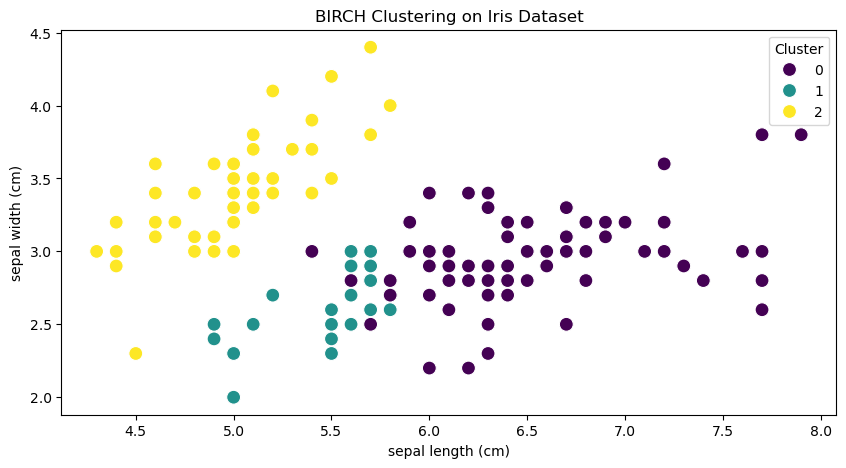

In [152]:
###########################################################
#[2-1] BIRCH(Balanced Iterative Reducing and Clustering using Hierarchies)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# BIRCH 알고리즘 적용
birch = Birch(n_clusters=3)
predicted_labels = birch.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("BIRCH Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.479
Accuracy: 0.987


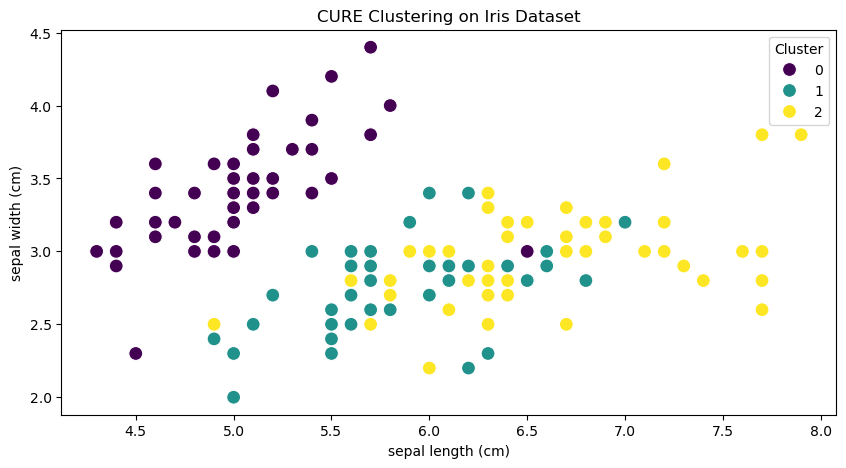

In [150]:
###########################################################
#[2-2] CURE(Clustering Using Representatives)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.stats import mode

# 간단한 CURE 알고리즘 구현
class CURE:
    def __init__(self, n_clusters=3, n_representatives=5, shrink_factor=0.5):
        self.n_clusters = n_clusters
        self.n_representatives = n_representatives
        self.shrink_factor = shrink_factor
        self.labels_ = None
    
    def fit_predict(self, X):
        # 초기 군집 설정 (각 포인트가 하나의 군집)
        n_samples = X.shape[0]
        clusters = [[i] for i in range(n_samples)]
        cluster_centers = [X[i] for i in range(n_samples)]
        
        # 계층적 군집화 과정
        while len(clusters) > self.n_clusters:
            # 각 군집에서 대표 포인트 샘플링
            representative_points = [self._get_representatives(X[cluster]) for cluster in clusters]
            
            # 군집 간 최소 거리 계산
            distances = cdist(np.vstack(representative_points), np.vstack(representative_points), metric='euclidean')
            np.fill_diagonal(distances, np.inf)
            min_idx = np.unravel_index(np.argmin(distances), distances.shape)
            cluster_a, cluster_b = min_idx[0] // self.n_representatives, min_idx[1] // self.n_representatives
            
            # 군집 병합
            clusters[cluster_a].extend(clusters[cluster_b])
            clusters.pop(cluster_b)
            
            # 병합된 군집의 중심 업데이트
            new_representative = self._get_representatives(X[clusters[cluster_a]])
            cluster_centers[cluster_a] = new_representative
            cluster_centers.pop(cluster_b)
        
        # 최종 군집 레이블 생성
        self.labels_ = np.empty(n_samples, dtype=int)
        for cluster_id, cluster in enumerate(clusters):
            for index in cluster:
                self.labels_[index] = cluster_id
                
        return self.labels_
    
    def _get_representatives(self, cluster_points):
        # 군집에서 대표 포인트를 샘플링하고 축소
        center = np.mean(cluster_points, axis=0)
        distances = cdist(cluster_points, [center], metric='euclidean').flatten()
        representative_indices = np.argsort(distances)[:self.n_representatives]
        representatives = cluster_points[representative_indices]
        return center + self.shrink_factor * (representatives - center)

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# CURE 알고리즘 적용
cure = CURE(n_clusters=3, n_representatives=5, shrink_factor=0.5)
predicted_labels = cure.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("CURE Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


C:\Users\BOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:593: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


Silhouette Score: 0.507
Accuracy: 0.687


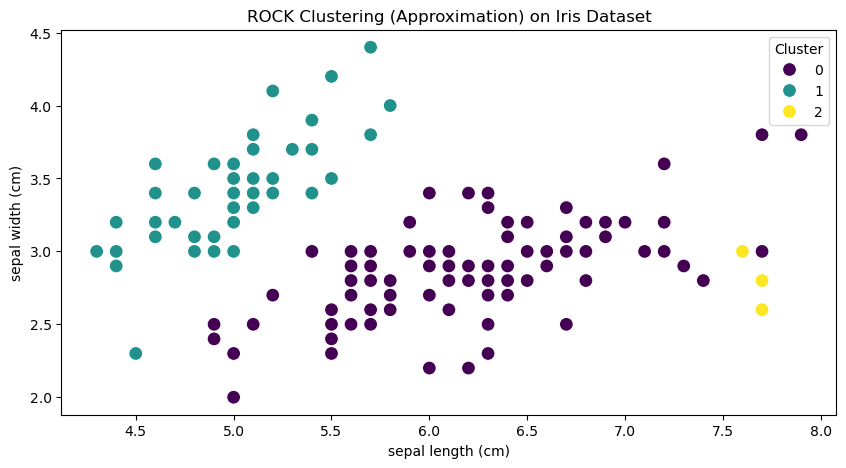

In [148]:
###########################################################
#[2-3] ROCK(Robust Clustering using Links)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# 1단계: K-최근접 이웃 그래프 생성 (유사도 링크 기반 생성)
n_neighbors = 10
knn_graph = kneighbors_graph(data, n_neighbors=n_neighbors, mode='connectivity', include_self=False)

# 2단계: Agglomerative Clustering을 통해 유사도 링크 기반으로 군집화
rock_clustering = AgglomerativeClustering(n_clusters=3, connectivity=knn_graph, linkage='average')
predicted_labels = rock_clustering.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("ROCK Clustering (Approximation) on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


C:\Users\BOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:593: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


Silhouette Score: 0.735
Accuracy: 0.699


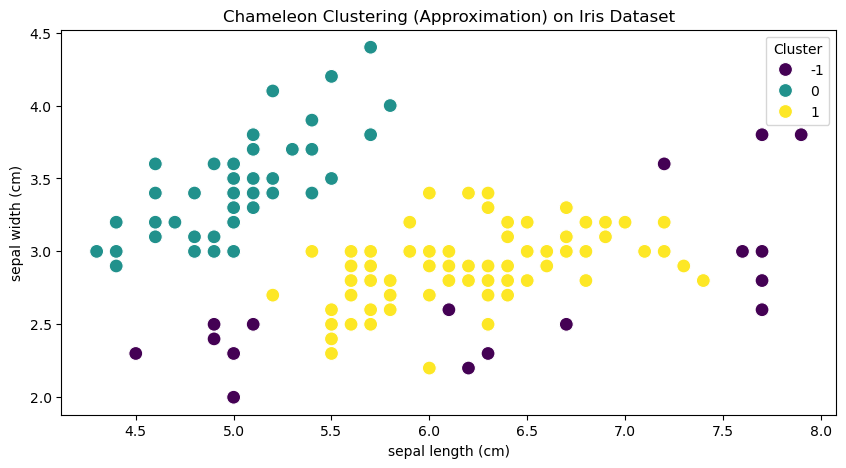

In [146]:
###########################################################
#[2-4] Chameleon
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# 1단계: K-최근접 이웃 그래프 생성
n_neighbors = 10
knn_graph = kneighbors_graph(data, n_neighbors=n_neighbors, include_self=False)

# 2단계: 초기 군집화 - 그래프 기반의 계층적 군집화 수행
initial_clustering = AgglomerativeClustering(n_clusters=10, connectivity=knn_graph, linkage='average')
initial_labels = initial_clustering.fit_predict(data)

# 3단계: 군집 병합 - DBSCAN을 사용하여 작은 군집을 밀도 기반으로 병합
# AgglomerativeClustering으로 생성된 초기 군집들을 DBSCAN으로 다시 병합
data_with_initial_labels = pd.DataFrame(data)
data_with_initial_labels['initial_cluster'] = initial_labels

# 각 초기 군집을 DBSCAN을 통해 병합
dbscan = DBSCAN(eps=0.5, min_samples=5)
final_labels = dbscan.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = final_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = final_labels != -1  # 노이즈가 아닌 포인트만 선택
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], final_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(final_labels)
for i in np.unique(final_labels):
    mask = (final_labels == i)
    if np.any(mask):  # 군집에 속하는 포인트가 있을 때만 계산
        mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels[valid_points], mapped_labels[valid_points])
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Chameleon Clustering (Approximation) on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.554
Accuracy: 0.893


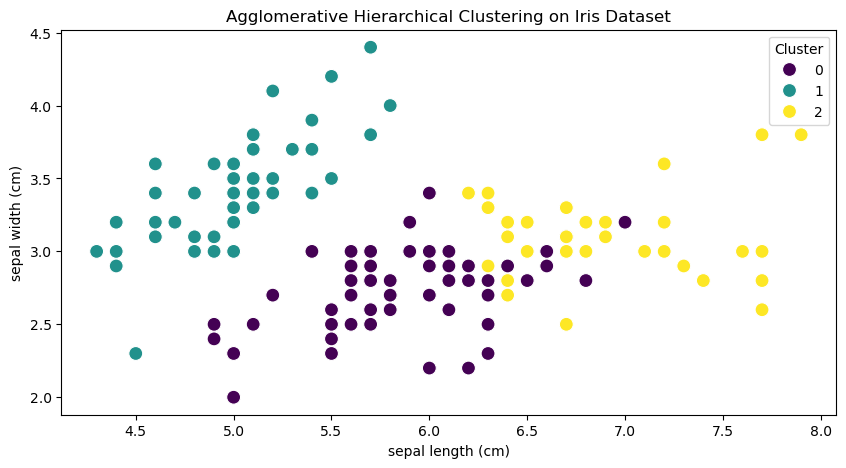

In [168]:
###########################################################
#[2-5] Hierarchical Clustering(Agglomerative)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Agglomerative Clustering 모델 설정 및 학습
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
predicted_labels = agg_clustering.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Agglomerative Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


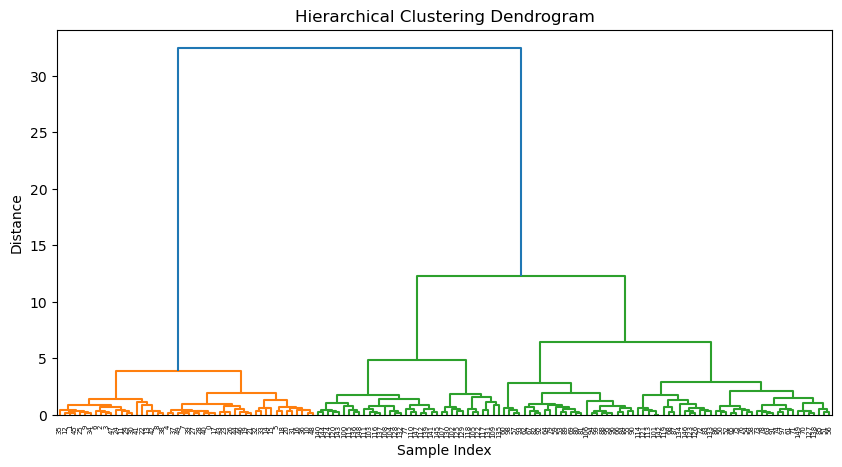

In [202]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()
X = iris.data

# 계층적 군집화 수행
Z = linkage(X, 'ward')  # ward: 최소분산 기준 병합

# 덴드로그램 시각화
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Silhouette Score: -0.002
Accuracy: 0.440


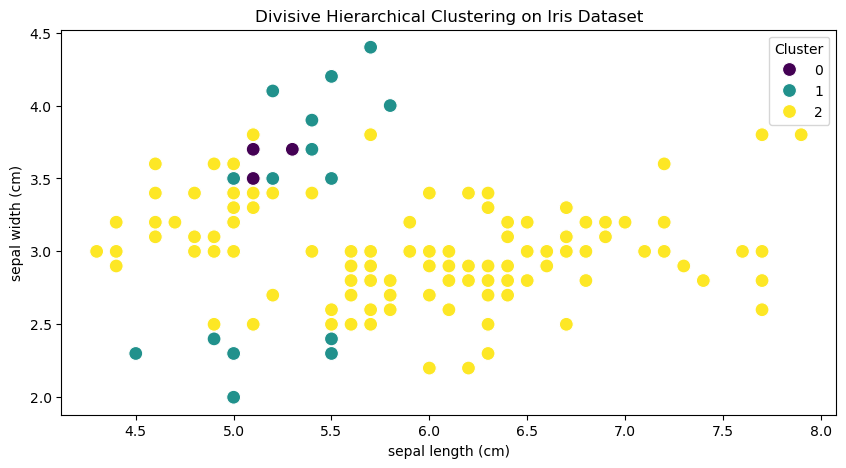

In [170]:
###########################################################
#[2-5] Hierarchical Clustering(Divisive)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Divisive Clustering 함수
def divisive_clustering(data, num_clusters):
    clusters = {0: data}  # 초기 전체 데이터를 하나의 큰 군집으로 설정
    current_cluster_id = 0
    
    while len(clusters) < num_clusters:
        # 가장 큰 군집 선택
        largest_cluster_id = max(clusters, key=lambda k: len(clusters[k]))
        largest_cluster_data = clusters[largest_cluster_id]
        
        # 해당 군집을 두 개로 분할
        kmeans = KMeans(n_clusters=2, random_state=0).fit(largest_cluster_data)
        labels = kmeans.labels_
        
        # 새로운 군집에 데이터 할당
        new_cluster_id = max(clusters.keys()) + 1
        clusters[largest_cluster_id] = largest_cluster_data[labels == 0]
        clusters[new_cluster_id] = largest_cluster_data[labels == 1]
        
        # 클러스터 ID 증가
        current_cluster_id += 1
    
    # 최종 군집 레이블 생성
    predicted_labels = np.zeros(data.shape[0], dtype=int)
    for cluster_id, cluster_data in clusters.items():
        for idx in range(data.shape[0]):
            if data[idx] in cluster_data:
                predicted_labels[idx] = cluster_id
                
    return predicted_labels

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Divisive Clustering 실행
num_clusters = 3
predicted_labels = divisive_clustering(data, num_clusters)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(num_clusters):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Divisive Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.735
Accuracy: 0.699


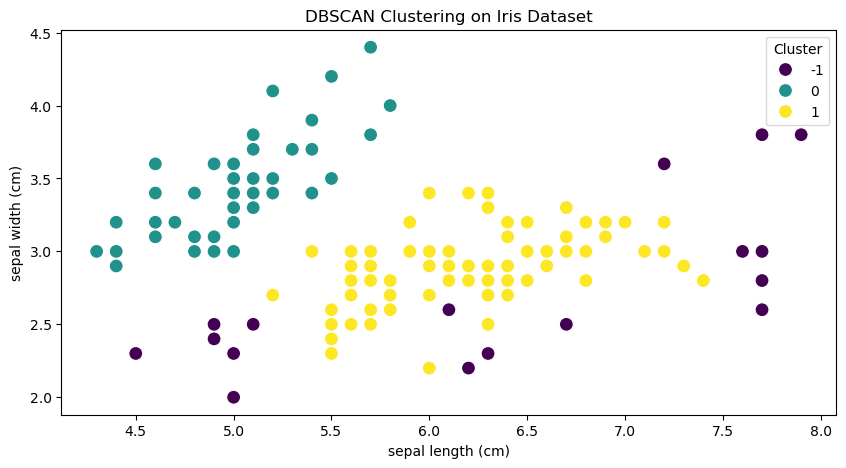

In [144]:
###########################################################
#[3-1] DBSCAN(Density-Based Spatial Clustering of Applications with Noise)	
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# DBSCAN 알고리즘 적용
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels = dbscan.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = predicted_labels != -1  # 노이즈가 아닌 포인트만 선택
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    if np.any(mask):  # 군집에 속하는 포인트가 있을 때만 계산
        mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels[valid_points], mapped_labels[valid_points])
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.786
Accuracy: 1.000


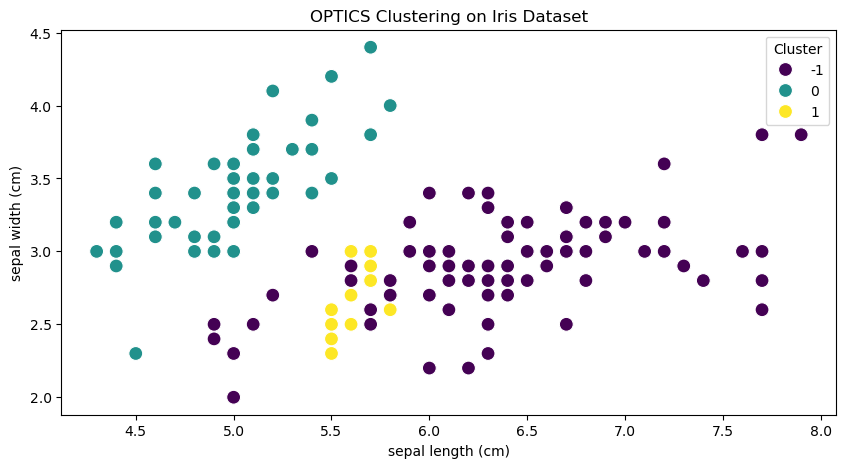

In [142]:
###########################################################
#[3-2] OPTICS(Ordering Points To Identify the Clustering Structure)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# OPTICS 알고리즘 적용
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
predicted_labels = optics.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = predicted_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels[valid_points], mapped_labels[valid_points])
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("OPTICS Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()

Silhouette Score: -0.371
Accuracy: 1.000


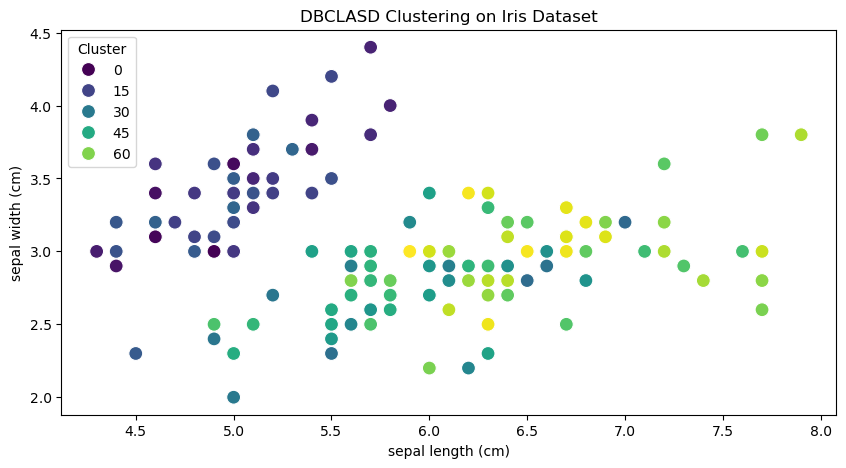

In [140]:
###########################################################
#[3-3] DBCLASD(Distribution Based Clustering of Large Spatial Databases)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# 간단한 DBCLASD 구현 (정규 분포 기반)
class DBCLASD:
    def __init__(self, threshold=0.01, epsilon=1e-6):
        self.threshold = threshold  # 분포 적합 임계값
        self.epsilon = epsilon  # 공분산 행렬에 추가할 작은 값
        self.clusters = []  # 군집 정보 저장
    
    def fit_predict(self, X):
        labels = -np.ones(X.shape[0], dtype=int)  # 초기값 -1 (노이즈)
        
        for i, point in enumerate(X):
            added_to_cluster = False
            for cluster_id, (mean, cov) in enumerate(self.clusters):
                # 기존 군집의 분포와 비교하여 해당 분포에 속하는지 확인
                adjusted_cov = cov + self.epsilon * np.eye(cov.shape[0])  # 작은 값을 더하여 양의 정부호 행렬로 만듦
                if multivariate_normal(mean=mean, cov=adjusted_cov).pdf(point) > self.threshold:
                    labels[i] = cluster_id
                    # 군집 업데이트
                    points_in_cluster = X[labels == cluster_id]
                    mean = np.mean(points_in_cluster, axis=0)
                    cov = np.cov(points_in_cluster, rowvar=False)
                    self.clusters[cluster_id] = (mean, cov)
                    added_to_cluster = True
                    break
            if not added_to_cluster:
                # 새로운 군집 생성
                labels[i] = len(self.clusters)
                mean = point
                cov = np.cov(X.T) + self.epsilon * np.eye(X.shape[1])  # 공분산 초기값에 epsilon을 더함
                self.clusters.append((mean, cov))
        
        self.labels_ = labels
        return labels

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# DBCLASD 알고리즘 적용
dbclasd = DBCLASD(threshold=0.01, epsilon=1e-6)
predicted_labels = dbclasd.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = predicted_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("DBCLASD Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.885
Accuracy: 0.921


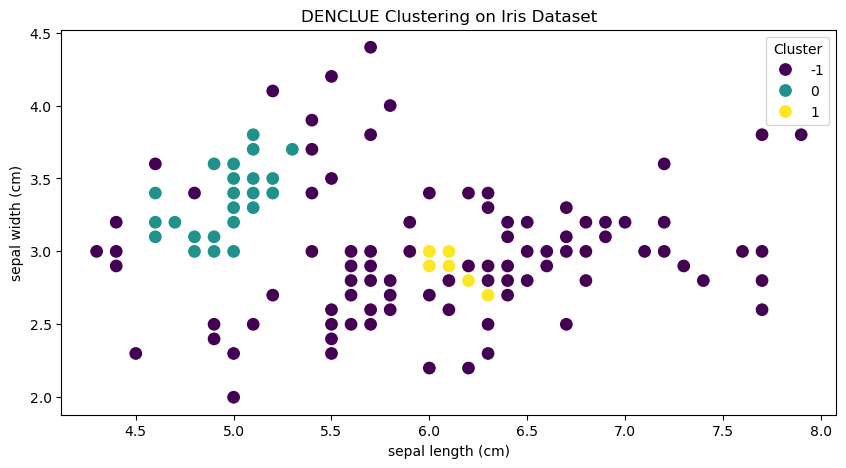

In [138]:
###########################################################
#[3-4] DENCLUE(DENsity-based CLUstEring)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KernelDensity
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Gaussian Kernel Density Estimation (KDE)를 사용하여 데이터의 밀도 기반 특징 추출
def kde_transform(data, bandwidth=0.5):
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(data)
    log_densities = kde.score_samples(data)
    return log_densities

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# KDE 변환 적용 (밀도 기반 특징 강조)
log_densities = kde_transform(data, bandwidth=0.5)
density_threshold = np.percentile(log_densities, 75)  # 밀도 기준을 75퍼센타일로 설정
high_density_points = data[log_densities >= density_threshold]  # 밀도가 높은 포인트 선택

# DBSCAN 알고리즘 적용 (밀도가 높은 영역에서 밀도 기반 군집화 수행)
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels = dbscan.fit_predict(high_density_points)

# 밀도가 높은 포인트들에 대한 레이블을 전체 데이터 레이블에 매핑
full_labels = -np.ones(data.shape[0], dtype=int)  # 초기값 -1 (노이즈)
high_density_indices = np.where(log_densities >= density_threshold)[0]
full_labels[high_density_indices] = predicted_labels

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = full_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = full_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], full_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(full_labels)
for i in np.unique(full_labels):
    mask = (full_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels[full_labels != -1], mapped_labels[full_labels != -1])
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("DENCLUE Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()



Silhouette Score: 0.686
Accuracy: 0.667


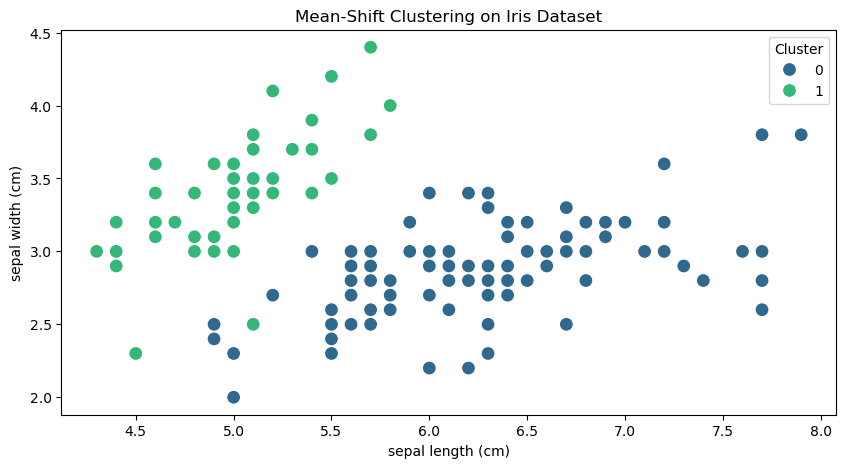

In [172]:
###########################################################
#[3-5] Mean-Shift Clustering
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Mean-Shift Clustering 모델 설정 및 학습
mean_shift = MeanShift()
predicted_labels = mean_shift.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(len(np.unique(predicted_labels))):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Mean-Shift Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.505
Accuracy: 0.993


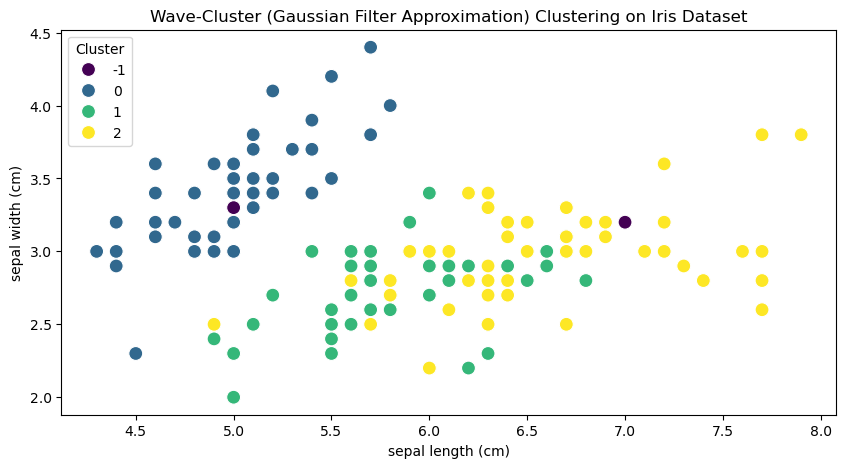

In [136]:
###########################################################
#[4-1] Wave-Cluster
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy.stats import mode

# Gaussian 필터를 사용하여 밀도 기반 특징을 강조하는 함수
def gaussian_filter_transform(data, sigma=1):
    transformed_data = []
    for feature in data.T:  # 각 피처(열)에 대해 필터링 수행
        transformed_feature = gaussian_filter1d(feature, sigma=sigma)
        transformed_data.append(transformed_feature)
    return np.array(transformed_data).T

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Gaussian 필터 적용 (밀도 기반 특징 강조)
transformed_data = gaussian_filter_transform(data, sigma=1)

# DBSCAN 알고리즘 적용 (변환된 데이터에서 밀도 기반 군집화 수행)
dbscan = DBSCAN(eps=0.5, min_samples=5)
predicted_labels = dbscan.fit_predict(transformed_data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = predicted_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Wave-Cluster (Gaussian Filter Approximation) Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()



Silhouette Score: 0.683
Accuracy: 0.407


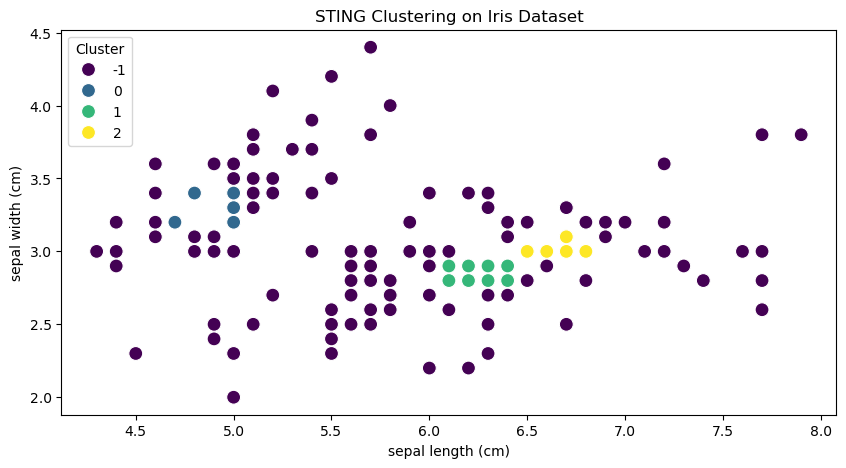

In [134]:
###########################################################
#[4-2] STING(Statistical Information Grid-based method)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# STING 군집화 클래스
class STING:
    def __init__(self, x_bins=10, y_bins=10, density_threshold=0.05):
        self.x_bins = x_bins  # X축 그리드 셀 개수
        self.y_bins = y_bins  # Y축 그리드 셀 개수
        self.density_threshold = density_threshold  # 군집 형성 밀도 임계값

    def fit_predict(self, X):
        # 첫 번째와 두 번째 피처만 사용하여 2D 그리드 생성
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        
        # 각 데이터 포인트의 그리드 셀 위치 계산
        x_bins = np.linspace(x_min, x_max, self.x_bins + 1)
        y_bins = np.linspace(y_min, y_max, self.y_bins + 1)
        grid = np.zeros((self.x_bins, self.y_bins), dtype=int)

        # 각 데이터 포인트를 그리드에 매핑하여 밀도 계산
        labels = -np.ones(X.shape[0], dtype=int)
        for i, (x, y) in enumerate(X[:, :2]):
            x_idx = np.digitize(x, x_bins) - 1
            y_idx = np.digitize(y, y_bins) - 1
            if x_idx < self.x_bins and y_idx < self.y_bins:
                grid[x_idx, y_idx] += 1
        
        # 밀도 기준으로 군집화 (density_threshold 이상인 셀을 군집으로 간주)
        cluster_id = 0
        for i in range(self.x_bins):
            for j in range(self.y_bins):
                if grid[i, j] >= self.density_threshold * X.shape[0]:  # 밀도 기준 만족 시 군집화
                    for k, (x, y) in enumerate(X[:, :2]):
                        x_idx = np.digitize(x, x_bins) - 1
                        y_idx = np.digitize(y, y_bins) - 1
                        if x_idx == i and y_idx == j:
                            labels[k] = cluster_id
                    cluster_id += 1

        self.labels_ = labels
        return self.labels_

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data[:, :2]  # 첫 번째와 두 번째 피처만 사용
true_labels = iris.target

# STING 알고리즘 적용
sting = STING(x_bins=10, y_bins=10, density_threshold=0.05)
predicted_labels = sting.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=[iris.feature_names[0], iris.feature_names[1]])
df['Cluster'] = predicted_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = predicted_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("STING Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.683
Accuracy: 0.407


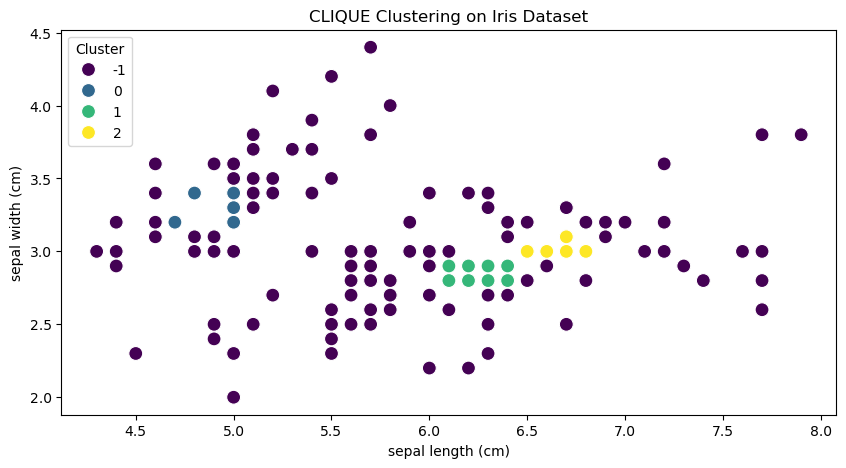

In [132]:
###########################################################
#[4-3] CLIQUE(CLustering In QUEst)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# CLIQUE 군집화 클래스
class CLIQUE:
    def __init__(self, x_bins=10, y_bins=10, density_threshold=0.05):
        self.x_bins = x_bins  # X축 그리드 셀 개수
        self.y_bins = y_bins  # Y축 그리드 셀 개수
        self.density_threshold = density_threshold  # 군집 형성 밀도 임계값

    def fit_predict(self, X):
        # 첫 번째와 두 번째 피처만 사용하여 2D 그리드 생성
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        
        # 각 데이터 포인트의 그리드 셀 위치 계산
        x_bins = np.linspace(x_min, x_max, self.x_bins + 1)
        y_bins = np.linspace(y_min, y_max, self.y_bins + 1)
        grid = np.zeros((self.x_bins, self.y_bins), dtype=int)

        # 각 데이터 포인트를 그리드에 매핑하여 밀도 계산
        labels = -np.ones(X.shape[0], dtype=int)
        for i, (x, y) in enumerate(X[:, :2]):
            x_idx = np.digitize(x, x_bins) - 1
            y_idx = np.digitize(y, y_bins) - 1
            if x_idx < self.x_bins and y_idx < self.y_bins:
                grid[x_idx, y_idx] += 1
        
        # 밀도 기준으로 군집화 (density_threshold 이상인 셀을 군집으로 간주)
        cluster_id = 0
        for i in range(self.x_bins):
            for j in range(self.y_bins):
                if grid[i, j] >= self.density_threshold * X.shape[0]:  # 밀도 기준 만족 시 군집화
                    for k, (x, y) in enumerate(X[:, :2]):
                        x_idx = np.digitize(x, x_bins) - 1
                        y_idx = np.digitize(y, y_bins) - 1
                        if x_idx == i and y_idx == j:
                            labels[k] = cluster_id
                    cluster_id += 1

        self.labels_ = labels
        return self.labels_

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data[:, :2]  # 첫 번째와 두 번째 피처만 사용
true_labels = iris.target

# CLIQUE 알고리즘 적용
clique = CLIQUE(x_bins=10, y_bins=10, density_threshold=0.05)
predicted_labels = clique.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=[iris.feature_names[0], iris.feature_names[1]])
df['Cluster'] = predicted_labels

# Silhouette Score 계산 (노이즈 데이터는 제외)
valid_points = predicted_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in np.unique(predicted_labels):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("CLIQUE Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.683
Accuracy: Cannot compute due to mismatch in label count.


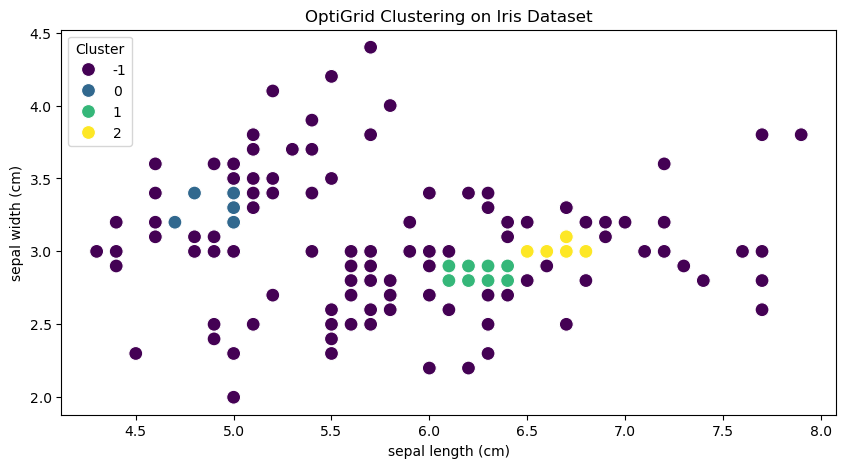

In [120]:
###########################################################
#[4-4] OptiGrid
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# OptiGrid 군집화 클래스
class OptiGrid:
    def __init__(self, x_bins=10, y_bins=10, density_threshold=0.05):
        self.x_bins = x_bins  # X축 그리드 셀 개수
        self.y_bins = y_bins  # Y축 그리드 셀 개수
        self.density_threshold = density_threshold  # 군집 형성 밀도 임계값

    def fit_predict(self, X):
        # 첫 번째와 두 번째 피처만 사용하여 2D 그리드 생성
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        
        # 각 데이터 포인트의 그리드 셀 위치 계산
        x_bins = np.linspace(x_min, x_max, self.x_bins + 1)
        y_bins = np.linspace(y_min, y_max, self.y_bins + 1)
        grid = np.zeros((self.x_bins, self.y_bins), dtype=int)

        # 각 데이터 포인트를 그리드에 매핑하여 밀도 계산
        labels = -np.ones(X.shape[0], dtype=int)
        for i, (x, y) in enumerate(X[:, :2]):
            x_idx = np.digitize(x, x_bins) - 1
            y_idx = np.digitize(y, y_bins) - 1
            if x_idx < self.x_bins and y_idx < self.y_bins:
                grid[x_idx, y_idx] += 1
        
        # 밀도 기준으로 군집화 (density_threshold 이상인 셀을 군집으로 간주)
        cluster_id = 0
        for i in range(self.x_bins):
            for j in range(self.y_bins):
                if grid[i, j] >= self.density_threshold * X.shape[0]:  # 밀도 기준 만족 시 군집화
                    for k, (x, y) in enumerate(X[:, :2]):
                        x_idx = np.digitize(x, x_bins) - 1
                        y_idx = np.digitize(y, y_bins) - 1
                        if x_idx == i and y_idx == j:
                            labels[k] = cluster_id
                    cluster_id += 1

        self.labels_ = labels
        return self.labels_

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data[:, :2]  # 첫 번째와 두 번째 피처만 사용
true_labels = iris.target

# OptiGrid 알고리즘 적용
optigrid = OptiGrid(x_bins=10, y_bins=10, density_threshold=0.05)
predicted_labels = optigrid.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=[iris.feature_names[0], iris.feature_names[1]])
df['Cluster'] = predicted_labels

# 군집 평가
# 노이즈 (-1) 데이터는 실루엣 점수 계산에서 제외합니다.
valid_points = predicted_labels != -1
if np.sum(valid_points) > 1:
    silhouette_avg = silhouette_score(data[valid_points], predicted_labels[valid_points])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score: Not enough valid points for calculation.")

# 정확도 계산 (실제 레이블이 있는 경우)
# 주의: 군집화 결과는 정답 레이블과 직접적으로 매칭되지 않을 수 있습니다.
if len(np.unique(predicted_labels)) == len(np.unique(true_labels)):
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy: {accuracy:.3f}")
else:
    print("Accuracy: Cannot compute due to mismatch in label count.")

# 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("OptiGrid Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()



Silhouette Score: 0.501
Accuracy: 0.967


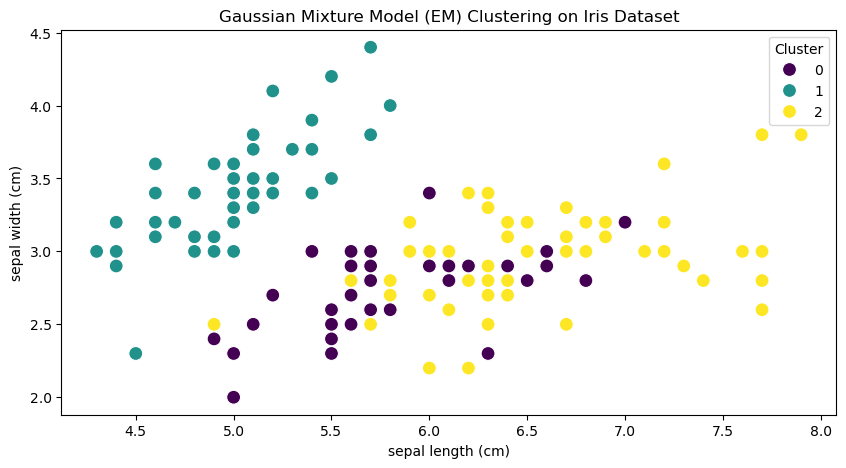

In [122]:
###########################################################
#[5-1] EM(Expectation-Maximization)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Gaussian Mixture (EM 알고리즘) 모델 적용
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(data)
predicted_labels = gmm.predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
# Gaussian Mixture 모델의 군집 레이블과 실제 레이블은 매칭이 다를 수 있음
mapped_labels = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Gaussian Mixture Model (EM) Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.554
Accuracy: 0.893


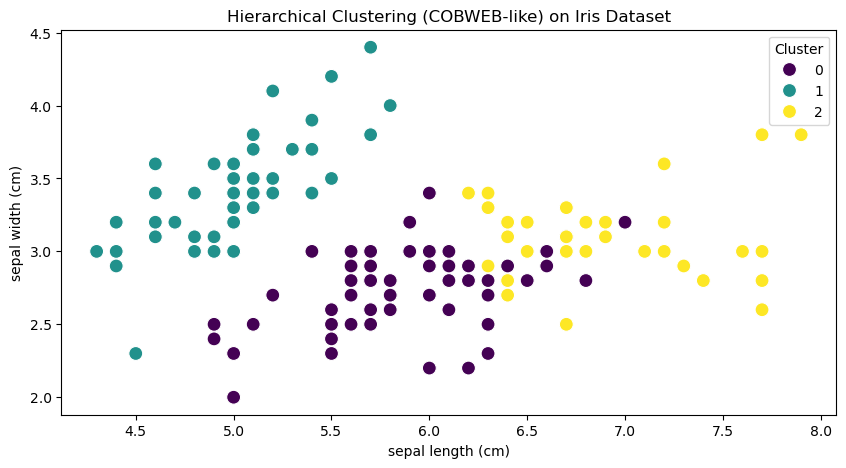

In [124]:
###########################################################
#[5-2] COBWEB
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# 계층적 군집화 모델 설정 (COBWEB의 개념에 맞춰 유사한 방식으로 계층적 군집화 수행)
# 계층적 군집화는 특징이 유사한 데이터 포인트를 병합하는 방식으로, COBWEB과 유사하게 작동
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
predicted_labels = agglomerative_clustering.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Hierarchical Clustering (COBWEB-like) on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.554
Accuracy: 0.893


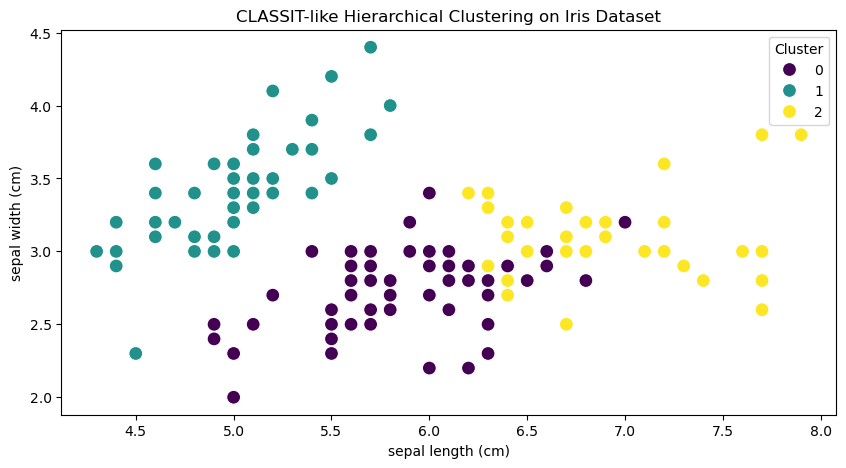

In [126]:
###########################################################
#[5-3] CLASSIT
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# 계층적 군집화 모델 설정 (CLASSIT의 증분 학습을 반영한 간단한 계층적 군집화)
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
predicted_labels = agglomerative_clustering.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("CLASSIT-like Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.140
Accuracy: 0.987


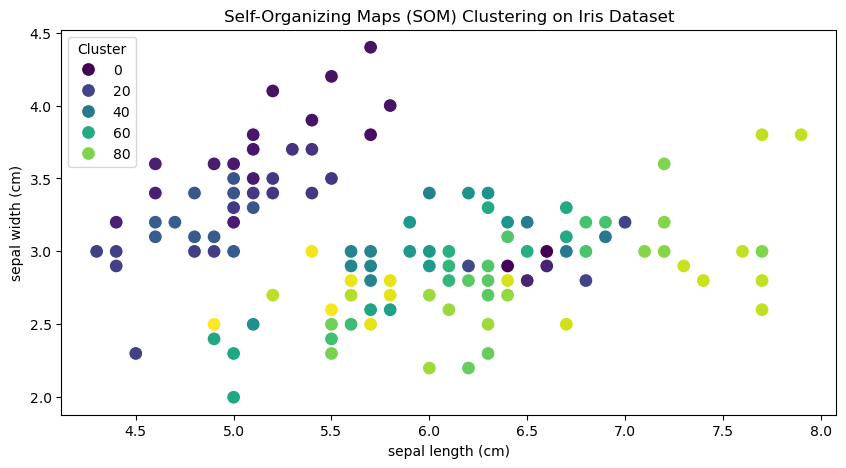

In [130]:
###########################################################
#[5-4] SOMs(Self-Organizing Maps)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

class SimpleSOM:
    def __init__(self, x_size=10, y_size=10, input_len=4, sigma=1.0, learning_rate=0.5, iterations=100):
        self.x_size = x_size
        self.y_size = y_size
        self.input_len = input_len
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = np.random.rand(x_size, y_size, input_len)

    def _neighborhood_function(self, distance, iteration):
        # 이웃 영향 반경 계산
        return np.exp(-distance / (2 * (self.sigma * (1 - iteration / self.iterations)) ** 2))

    def _learning_rate_decay(self, iteration):
        # 학습률 감소
        return self.learning_rate * (1 - iteration / self.iterations)

    def train(self, data):
        for iteration in range(self.iterations):
            for x in data:
                # 최적의 BMU 찾기
                bmu_idx = self.find_bmu(x)
                bmu_distance = np.array([[np.linalg.norm(np.array([i, j]) - bmu_idx) for j in range(self.y_size)] for i in range(self.x_size)])
                
                # 이웃 가중치 업데이트
                learning_rate = self._learning_rate_decay(iteration)
                neighborhood = self._neighborhood_function(bmu_distance, iteration)
                self.weights += learning_rate * neighborhood[:, :, np.newaxis] * (x - self.weights)

    def find_bmu(self, x):
        # 입력 벡터에 가장 가까운 BMU(가중치)를 찾음
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), (self.x_size, self.y_size))

    def map_vects(self, data):
        # 데이터 포인트들을 SOM 맵에 매핑
        return np.array([self.find_bmu(x) for x in data])

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# SOM 모델 설정 및 학습
som = SimpleSOM(x_size=10, y_size=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5, iterations=100)
som.train(data)

# 각 데이터 포인트의 BMU 찾기
bmu_indices = som.map_vects(data)
bmu_labels = np.ravel_multi_index(bmu_indices.T, (10, 10))  # BMU를 1D 레이블로 변환

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = bmu_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, bmu_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(bmu_labels)
for i in np.unique(bmu_labels):
    mask = (bmu_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Self-Organizing Maps (SOM) Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.501
Accuracy: 0.967


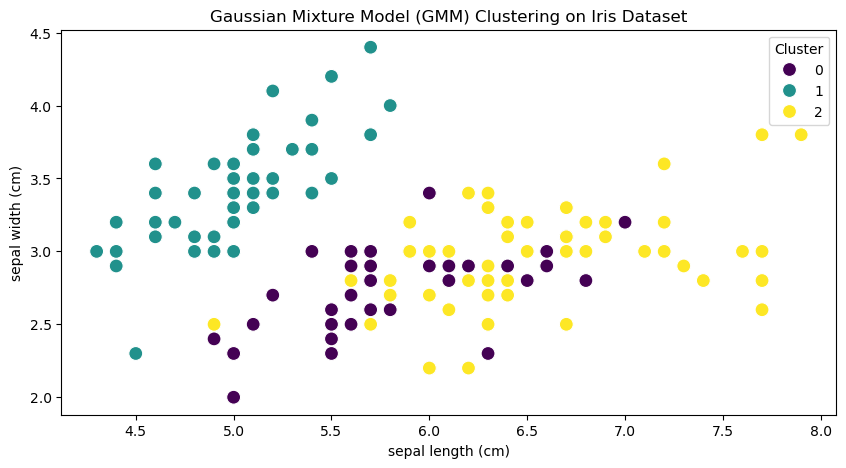

In [174]:
###########################################################
#[5-5] GMM(Gaussian Mixture Model)
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# GMM 모델 설정 및 학습
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
predicted_labels = gmm.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매칭하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Gaussian Mixture Model (GMM) Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


C:\Users\BOK\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: 0.554
Accuracy: 0.907


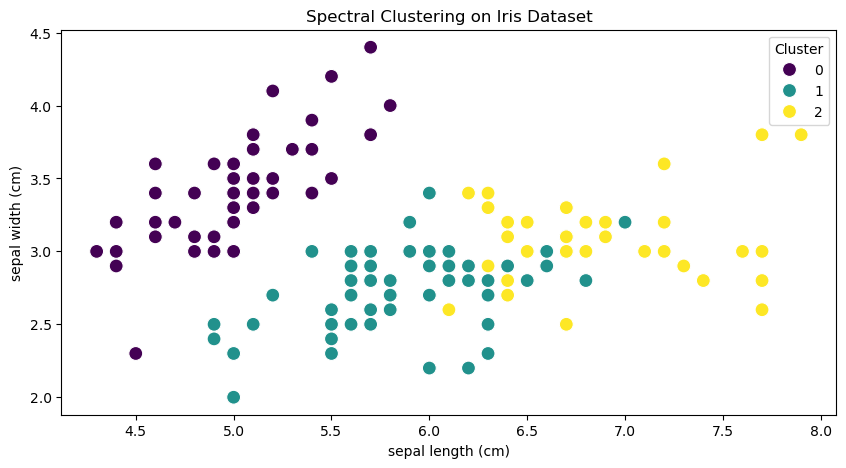

In [176]:
###########################################################
#[6-1] Spectral Clustering
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Spectral Clustering 모델 설정 및 학습
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
predicted_labels = spectral_clustering.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매핑하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(3):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Spectral Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()


Silhouette Score: 0.347
Accuracy: 0.967


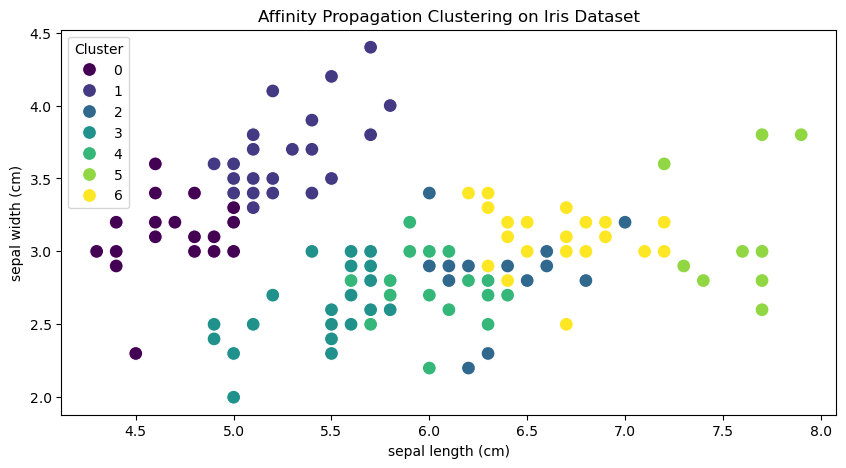

In [178]:
###########################################################
#[6-2] Affinity Propagation
###########################################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mode

# Iris 데이터셋 로드
iris = load_iris()
data = iris.data
true_labels = iris.target

# Affinity Propagation 모델 설정 및 학습
affinity_propagation = AffinityPropagation(random_state=0)
predicted_labels = affinity_propagation.fit_predict(data)

# 데이터프레임으로 변환하여 시각화 준비
df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = predicted_labels

# Silhouette Score 계산
silhouette_avg = silhouette_score(data, predicted_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Accuracy 계산 (군집 레이블과 실제 레이블을 매핑하여 정확도 계산)
mapped_labels = np.zeros_like(predicted_labels)
for i in range(len(np.unique(predicted_labels))):
    mask = (predicted_labels == i)
    mapped_labels[mask] = mode(true_labels[mask])[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f"Accuracy: {accuracy:.3f}")

# 시각화 (첫 번째와 두 번째 피처 사용)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Affinity Propagation Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])  # 첫 번째 피처 (sepal length)
plt.ylabel(iris.feature_names[1])  # 두 번째 피처 (sepal width)
plt.legend(title='Cluster')
plt.show()
